<a href="https://colab.research.google.com/github/Meresa16/data-science-assignment-/blob/main/Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score


# import Dataset

In [2]:
#diabetes_x,diabetes_y=datasets.load_diabetes(return_X_y=True)

In [3]:
#data=pd.read_csv('./prostate.csv')
data=pd.read_csv('/content/drive/MyDrive/prostate.csv')
data.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


# Separate Dependent and Independet feature or variable


In [4]:
x=data.drop('Target', axis=1)
y=data['Target']
x

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1.558145,7,80,5.477509


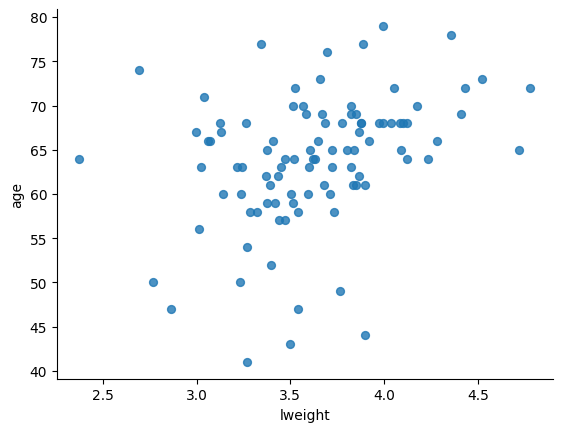

In [16]:
# @title lweight vs age

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='lweight', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

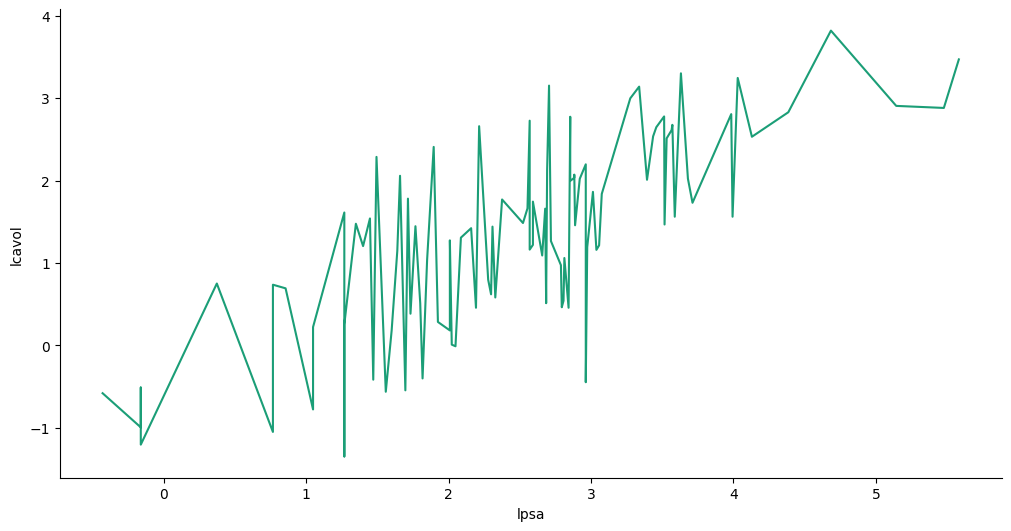

In [15]:
# @title lpsa vs lcavol

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lpsa']
  ys = series['lcavol']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('lpsa', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lpsa')
_ = plt.ylabel('lcavol')

In [5]:
#sns.pairplot(x)

In [6]:
#sns.heatmap(data.corr(),annot=True)

# Split the dataset into Training and testing using 15% testing dataset

In [7]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.15)

# ***1. Prdiect using Linear Regression Model***




In [8]:
lreg=LinearRegression()
pre_lreg=lreg.fit(data[['lcp']],data['Target'])
L_pred=lreg.predict(x_test[['lcp']])
# Evaluation
Lr_Accuracy=mean_squared_error(y_test,L_pred)



## 2. ***Logistic Model***

In [9]:
log=LogisticRegression()
Log_reg=log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print(log.score(x_train,y_train))
log_score=log.score(x_test,y_test)
log_score

0.8902439024390244


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

## 3. Support Vector Model

In [10]:
svm_reg=svm.SVC(kernel='linear',random_state=0)
svm_reg.fit(x_train,y_train)
y_svm_pred=svm_reg.predict(x_test)
svm_score=svm_reg.score(x_test,y_test)
svm_score

0.9333333333333333

## 4. Multiple Regression Model

In [11]:
M_reg=LinearRegression()
M_reg.fit(x_train,y_train)
y_M_reg=M_reg.predict(x_test)
M_score_reg=M_reg.score(x_test,y_M_reg)
M_score_reg


1.0

## 5. Decision Tree Model

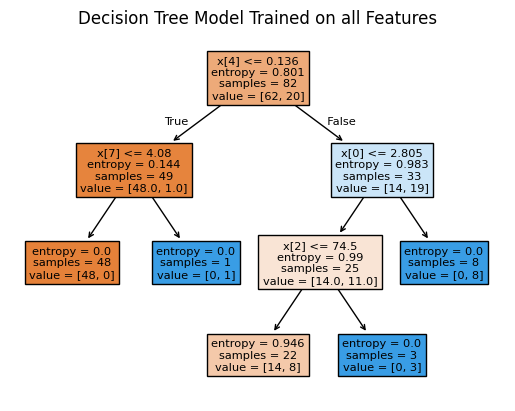

1.0

In [12]:
plt.figure()
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)
y_Dec_pred=clf.fit(x_train,y_train)
y_Dt_pred=clf.predict(x_test,y_Dec_pred)
plot_tree(y_Dec_pred,filled=True)
plt.title("Decision Tree Model Trained on all Features")
plt.show()
# Evaluation Models
Dt_Accuracy=accuracy_score(y_test,y_Dt_pred)
Dt_Accuracy

# KNN

In [13]:
m_regr=KNeighborsClassifier()
m_regr.fit(x_train,y_train)
y_pred_m=m_regr.predict(x_test)
# evaluation models
Ml_Accuracy=accuracy_score(y_test,y_pred_m)
print('Accuracy of KNN is : ',Ml_Accuracy)

Accuracy of KNN is :  1.0


## Show Diagram for all Model

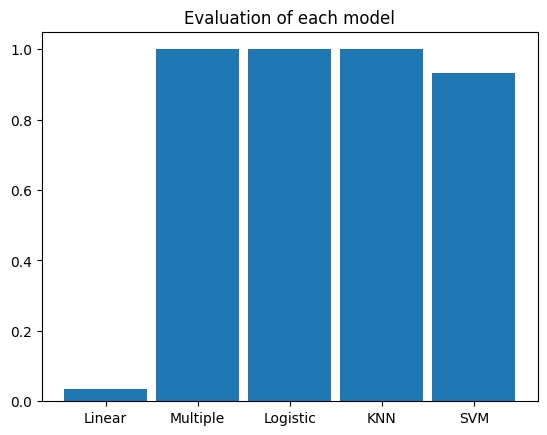

In [14]:
categories=['Linear','Multiple','Logistic','KNN','SVM']
values=[Lr_Accuracy,log_score,log_score,Ml_Accuracy,svm_score]
plt.bar(categories,values,width=0.9)
plt.title('Evaluation of each model')
plt.show()

In [17]:
#save the best model i.e Logistic model
import pickle
pickle.dump(log,open('model.pkl','wb'))